# Exploratory Data Analysis Of Video Game Sales

The Video Games Sales dataset was downloaded from kaggle and contains sales data for video games that have sold more than 100,000 copies around the world. In this notebook, we'll do an exploratory data analysis of the data to see if there are any interesting patterns or facts regarding video game sales. We will use python libraries like numpy, pandas, pandas, matplotlib and seaborn for our analysis. This notebook is a part of my submissions to the course: Data Analysis with Python: Zero to Pandas.

## Downloading the Dataset


In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prithivimoktan
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 83.9MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './videogamesales'

In [5]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "videogamesales-data-analysis-2"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "moktanprithivi/videogamesales-data-analysis-2" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/moktanprithivi/videogamesales-data-analysis-2


'https://jovian.ai/moktanprithivi/videogamesales-data-analysis-2'

## Data Preparation and Cleaning


In [10]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Reading the vgsales.csv and storing it in the form of a dataframe
games_df = pd.read_csv(data_dir + "/vgsales.csv")

In [12]:
#Viewing the dataframe
games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [13]:
#Looking at the basic information about the dataframe
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [14]:
#Finding out the shape of the dataframe
games_df.shape

(16598, 11)

In [15]:
#Lets check for unique values
games_df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [16]:
#Lets check for any null values
games_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

<AxesSubplot:>

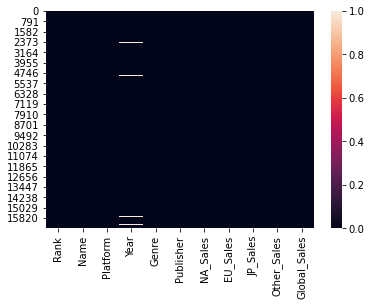

In [17]:
#A heatmap representation of the null values
sns.heatmap(games_df.isnull())

In [18]:
#We need to deal with the null values so this does not affect our analysis, so lets make a copy of the dataframe.
games2_df=games_df.copy()

In [19]:
games2_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [20]:
#Finding the rows where the year is NaT
games2_df[games2_df.Year.isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [21]:
#Since there is no way for me to know the Year of releases of some games I will be deleting the rows with NULL values.
games2_df = games2_df.dropna(axis=0, subset=['Year'])

In [22]:
#Dropping the null rows for the publisher column too
games2_df = games2_df.dropna(axis=0, subset=['Publisher'])

In [23]:
#We now have no nulls in our dataframe
games2_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "moktanprithivi/videogamesales-data-analysis-2" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/moktanprithivi/videogamesales-data-analysis-2


'https://jovian.ai/moktanprithivi/videogamesales-data-analysis-2'

## Exploratory Analysis and Visualization





### Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Lets analyse the trends between any columns and see if we can discover any relationships between them. But first, lets see the top 10 games to be sold.

In [27]:
games2_df.sort_values('Global_Sales', ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


From this we can see that, the top 10 games are actually all sold by Nintendo. Lets see the ranking of the publishers and how the others compare against Nintendo.

Text(0.5, 1.0, 'Global sales by publishers')

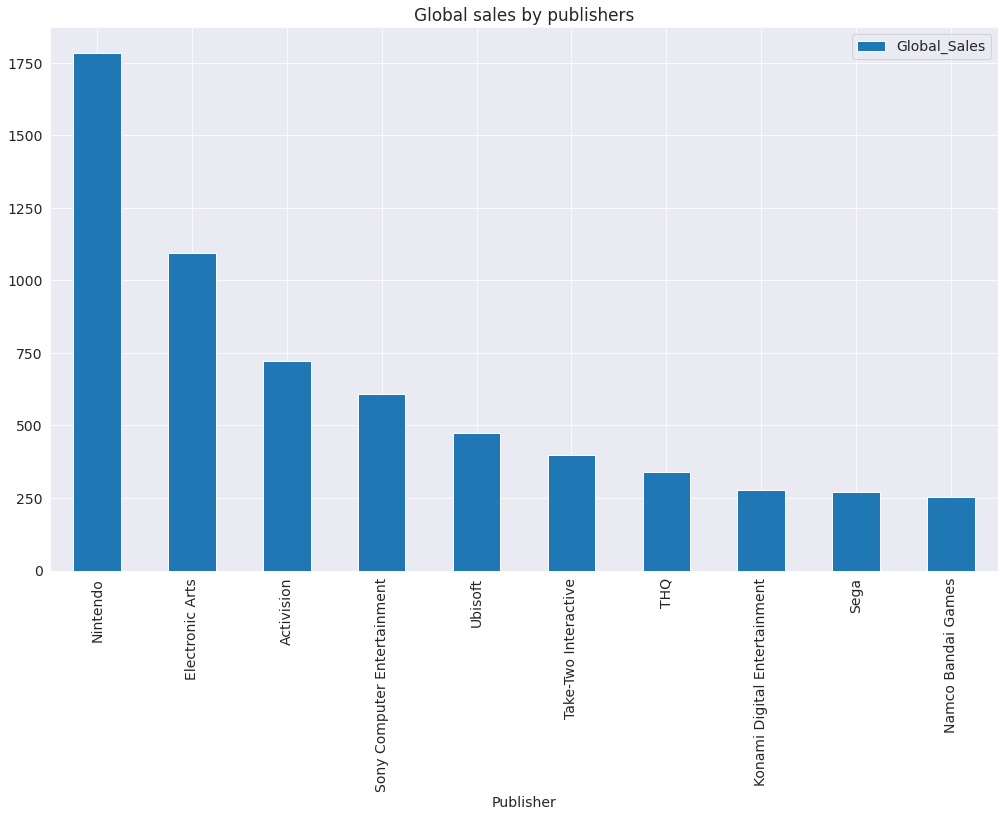

In [28]:
best_publishers = games2_df.groupby('Publisher')[['Global_Sales']].sum()
top10_best_publishers = best_publishers.sort_values('Global_Sales', ascending=False).head(10).plot(kind='bar',figsize=(17,10))
plt.title('Global sales by publishers')

#### From here we can see how big Nintendo is, then followed by Electronic Arts.

### Lets see how EU Sales, NA Sales, JP sales and other sales compare against each other.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

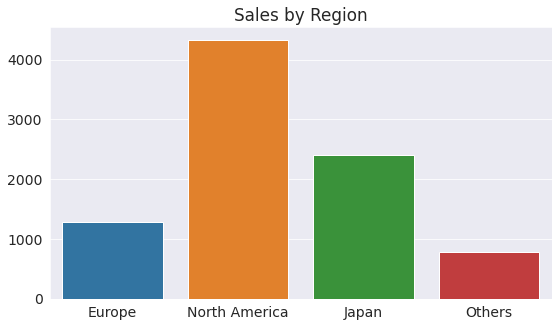

<Figure size 1080x720 with 0 Axes>

In [29]:
EU_sales = games2_df.JP_Sales.sum()
NA_sales = games2_df.NA_Sales.sum()
JP_sales = games2_df.EU_Sales.sum()
Other_sales = games2_df.Other_Sales.sum()
Regions = ['Europe', 'North America', 'Japan', 'Others']
Region_sales = [EU_sales, NA_sales, JP_sales, Other_sales]

#Plotting the region_sales against the regions.
sns.barplot(Regions, Region_sales)
plt.title('Sales by Region')
plt.figure(figsize=(15, 10))

### Lets have a look at total sales by Genre

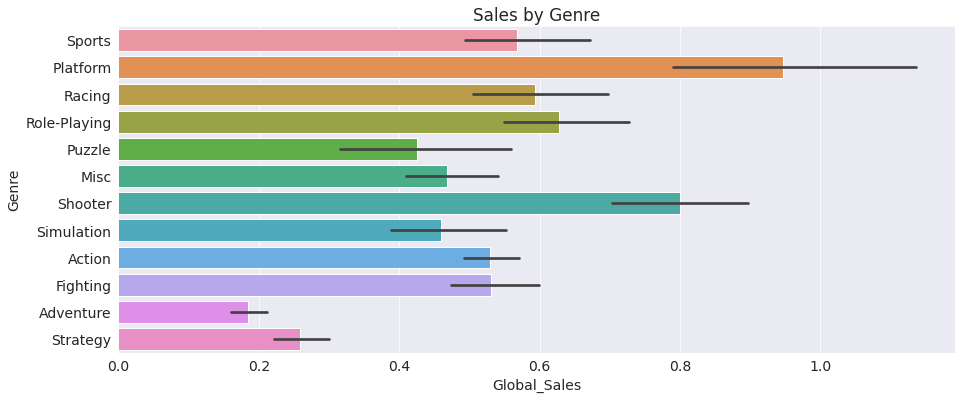

In [30]:
plt.figure(figsize=(15,6))
plt.title("Sales by Genre")
sns.barplot(x='Global_Sales',y='Genre',data=games2_df);

### Lets compare this to the number of games produced by the genre.

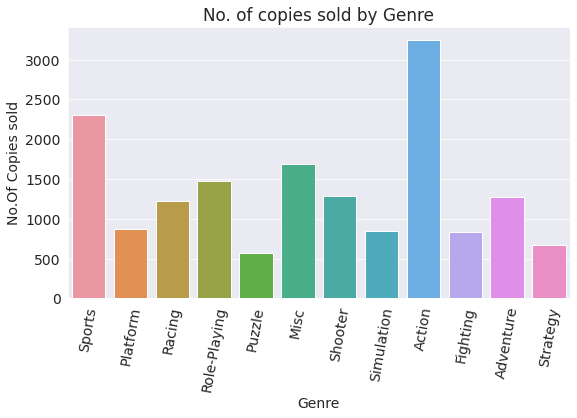

In [31]:
ax = sns.countplot(x="Genre", data=games2_df)
plt.xticks(rotation=80)
plt.xlabel('Genre')
plt.ylabel('No.Of Copies sold')
plt.title('No. of copies sold by Genre');

#### Action followed by Sports has been the most popular games sold.

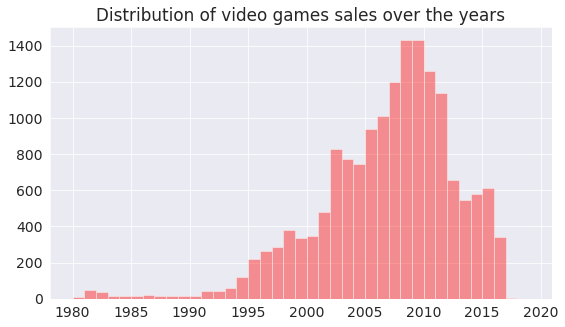

In [32]:
plt.title('Distribution of video games sales over the years')
plt.hist(games2_df.Year, alpha=0.4, bins=np.arange(1980, 2020, 1), color = "red");

#### From here we can see that the video games was most popular during the years of 2008-2010

### Finally, lets have a look at the most popular platform for gaming.

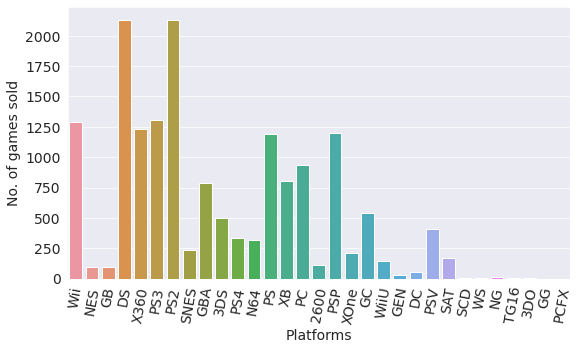

In [33]:
ax = sns.countplot(x="Platform", data=games2_df)
plt.xticks(rotation = 80);
plt.xlabel('Platforms')
plt.ylabel('No. of games sold');

##### DS and PS2 seem to be the most popular followed by Wii, PS and PSP.

Let us save and upload our work to Jovian before continuing

In [34]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "moktanprithivi/videogamesales-data-analysis-2" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/moktanprithivi/videogamesales-data-analysis-2


'https://jovian.ai/moktanprithivi/videogamesales-data-analysis-2'

## Asking and Answering Questions



## Which year had the highest amount of Global sales?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


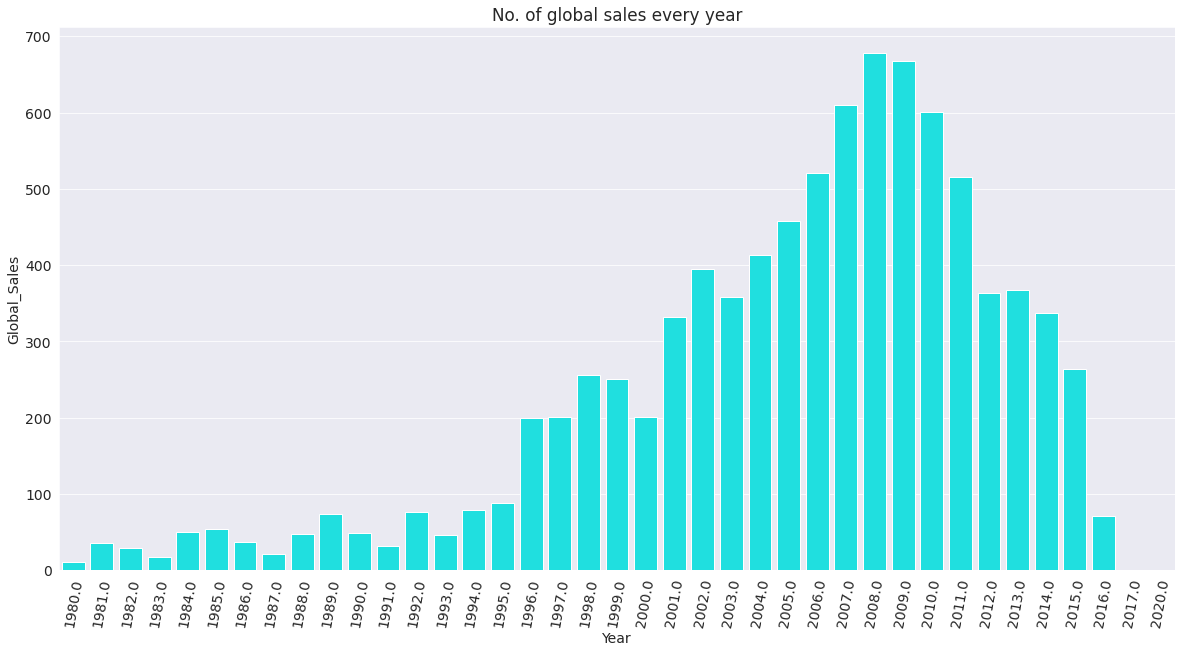

In [36]:
every_year = games2_df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(20, 10))
plt.xticks(rotation=80)
plt.title("No. of global sales every year")
plt.xlabel('Years')
plt.ylabel('Sales')
sns.barplot(every_year.index, every_year , color='Cyan');

#### From this we can clearly see that 2008 and 2009 had the highest amount of sales. 2008 had the highest amount of global_sales.

## Find the total distribution of the total sales amoing the regions.

In [37]:
#Lets first calculate the percentage of every regions sales compared to the global sales.
games2_df['Percentage_sales_from_NA']= (games2_df.NA_Sales/ games2_df.Global_Sales) * 100
games2_df['Percentage_sales_from_EU']= (games2_df.EU_Sales/ games2_df.Global_Sales) * 100
games2_df['Percentage_sales_from_Japan']= (games2_df.JP_Sales/ games2_df.Global_Sales) * 100
games2_df['Percentage_sales_from_others']= (games2_df.Other_Sales/ games2_df.Global_Sales) * 100

games2_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Percentage_sales_from_NA,Percentage_sales_from_EU,Percentage_sales_from_Japan,Percentage_sales_from_others
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50.145033,35.073725,4.556442,10.224801
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.266402,8.896620,16.923459,1.913519
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,44.249023,35.957566,10.580681,9.240648
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,47.727273,33.363636,9.939394,8.969697
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,35.926044,28.339178,32.578897,3.187759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,100.000000,0.000000,0.000000,0.000000
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,100.000000,0.000000,0.000000,0.000000
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.000000
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.000000,100.000000,0.000000,0.000000


In [38]:
#Finding the mean of the Percentage sales of every region.
Mean_sales_NA = games2_df.Percentage_sales_from_NA.mean()
Mean_sales_EU = games2_df.Percentage_sales_from_EU.mean()
Mean_sales_Japan = games2_df.Percentage_sales_from_Japan.mean()
Mean_sales_Others = games2_df.Percentage_sales_from_others.mean()

print("These are the percentage of sales which each region consumed:")
print("NA: {:.2f}% \nEU: {:.2f}% \nJP: {:.2f}% \nOthers: {:.2f}%".format(Mean_sales_NA,Mean_sales_EU,Mean_sales_Japan,Mean_sales_Others))

These are the percentage of sales which each region consumed:
NA: 45.39% 
EU: 22.90% 
JP: 24.42% 
Others: 6.48%


## Who are the Top 10 Publishers?


In [39]:
top_10_Publishers = games2_df.Publisher.value_counts().head(10)
top_10_Publishers

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


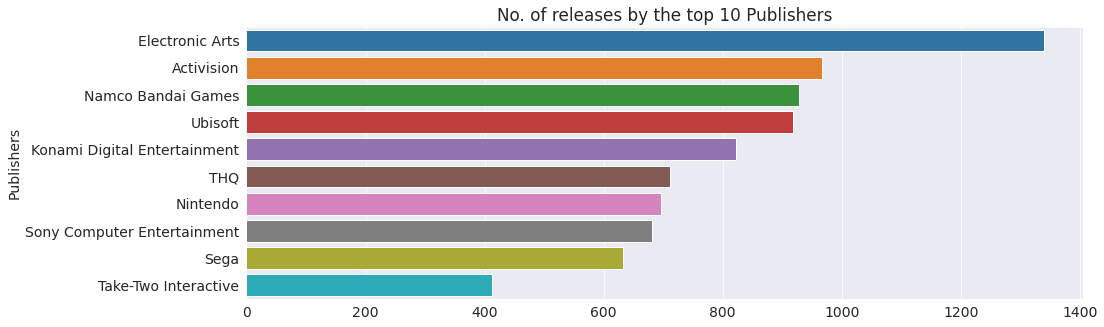

In [40]:
plt.figure(figsize=(15,5))
plt.title("No. of releases by the top 10 Publishers")
sns.barplot(top_10_Publishers, top_10_Publishers.index);
plt.xlabel('')
plt.ylabel('Publishers');

#### Therefore, we can see that EA has the highest amount of releases of the games throughout these years.

## What are the 5 most popular games in each regions? 

In [41]:
EU_five = games2_df.sort_values('EU_Sales', ascending=False).head(5)
NA_five = games2_df.sort_values('NA_Sales', ascending=False).head(5)
JP_five = games2_df.sort_values('JP_Sales', ascending=False).head(5)

AverageOfEU = games2_df.EU_Sales / games2_df.Global_Sales 

In [42]:
print(EU_five[['Name', 'EU_Sales', 'Global_Sales', 'Percentage_sales_from_EU']])
print(NA_five[['Name', 'NA_Sales','Global_Sales', 'Percentage_sales_from_NA']])
print(JP_five[['Name', 'JP_Sales', 'Global_Sales', 'Percentage_sales_from_Japan']])

                  Name  EU_Sales  Global_Sales  Percentage_sales_from_EU
0           Wii Sports     29.02         82.74                 35.073725
2       Mario Kart Wii     12.88         35.82                 35.957566
3    Wii Sports Resort     11.01         33.00                 33.363636
10          Nintendogs     11.00         24.76                 44.426494
16  Grand Theft Auto V      9.27         21.40                 43.317757
                Name  NA_Sales  Global_Sales  Percentage_sales_from_NA
0         Wii Sports     41.49         82.74                 50.145033
1  Super Mario Bros.     29.08         40.24                 72.266402
9          Duck Hunt     26.93         28.31                 95.125397
5             Tetris     23.20         30.26                 76.668870
2     Mario Kart Wii     15.85         35.82                 44.249023
                             Name  JP_Sales  Global_Sales  \
4        Pokemon Red/Pokemon Blue     10.22         31.37   
12    Pokemon 

#### This tells us that, Wii Sports was very popular in both EU and NA while Japan had more interest in Pokemon.

## What is the worst selling game?

In [43]:
games2_df.tail(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Percentage_sales_from_NA,Percentage_sales_from_EU,Percentage_sales_from_Japan,Percentage_sales_from_others
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.0,0.0,0.0,0.01,100.0,0.0,0.0,0.0


Let us save and upload our work to Jovian before continuing.

In [44]:
import jovian

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "moktanprithivi/videogamesales-data-analysis-2" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/moktanprithivi/videogamesales-data-analysis-2


'https://jovian.ai/moktanprithivi/videogamesales-data-analysis-2'

## Inferences and Conclusion

I looked at video game sales over the last 40 years, from 1980 through 2020. I performed the analysis utilizing the numpy, pandas, matplotlib, seaborns, and other libraries that have proven to be incredibly effective tools for simplifying a dataframe. We can see that NA has consumed nearly 50% of the games, followed by EU and Japan third. Nintendo seems to be the biggest publisher and Electronic Arts has the highest number of video games.

In [46]:
import jovian

In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "moktanprithivi/videogamesales-data-analysis-2" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/moktanprithivi/videogamesales-data-analysis-2


'https://jovian.ai/moktanprithivi/videogamesales-data-analysis-2'

## References and Future Work

There is a lot 
There is plenty of analysing to be done in my datasheet and I want to try all the different codes in the libraries to analyse more effectively.

In [48]:
import jovian

In [49]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "moktanprithivi/videogamesales-data-analysis-2" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/moktanprithivi/videogamesales-data-analysis-2


'https://jovian.ai/moktanprithivi/videogamesales-data-analysis-2'